In [1]:
from tqdm import tqdm
import os
from glob import glob

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "Keep"

def to_keep(ID):
    first = ID[0] in {"A", "T"}
    try:
        int(ID[1])
        return first
    except ValueError:
        return False

def parse_middle(row):
    if row.name[1].startswith("T"):
        ent_type, span = row.middle.split(" ", 1)
        return {"entity_type": ent_type, "span": span}
    else:
        keys = ["attr_type", "attr_ref", "attr_val"]
        return dict(zip(keys, str(row.middle).split()))

def df_from_ann_file(f):
    df = pd.read_csv(f, sep="\t", header=None, 
                         names=["ID", "middle", "entity_name"])
    df = df[df.ID.apply(to_keep)]
    df["file"] = f
    df = df.set_index(["file", "ID"])
    mdf = pd.DataFrame.from_records(df.apply(parse_middle, axis="columns")).set_index(df.index)

    return df.join(mdf).drop("middle", axis=1)
    return pd.concat([df, mdf], axis=1)


def filter_df(df):
    to_drop = df.entity_type.isin({"Noteworthy", "DuplicatePage", "TranscriptionError_Document"})
    
    try:
        to_drop = to_drop | df.attr_type.isin({"Notary"})
    except AttributeError:
        pass    
    return df[~to_drop]

In [3]:
done = set()

dfs = []
pbar = tqdm(set(glob(f"{data_dir}/*/*.ann")))
for f in pbar:
    pbar.set_description(f)
    file = f.split("/")[-1]
    if file in done:
        continue
    done.add(file)    
    df = df_from_ann_file(f)
    
    dfs.append(df)

Keep/D/NL-HaNA_1.04.02_6860_0404.ann: 100%|█| 2490/2490 [00:18<00:00, 137.52it/s


In [4]:
big = pd.concat(dfs)
big = filter_df(big)

In [5]:
# Organisation needs attr Beneficiary
    
def is_bad_org(t, sub_df):
    atts = sub_df[sub_df.attr_ref == t]
    return atts[atts.attr_type == "Beneficiary"].shape[0] == 0

ls = []
for file, sub in tqdm(big.groupby(level=0)):    
    orgs = sub[sub.entity_type == "Organization"]
    for (file2, row_id), r in orgs.iterrows():
        bad  = is_bad_org(row_id, sub)
        if bad:
            sub = sub.drop((file2, row_id))
        else:
            print(file, sub.shape)
        
    ls.append(sub)
new_big = pd.concat(ls)

  8%|██▉                                    | 163/2146 [00:00<00:07, 269.26it/s]

Keep/A/NL-HaNA_1.04.02_6860_0200.ann (15, 6)
Keep/A/NL-HaNA_1.04.02_6860_0200.ann (14, 6)
Keep/A/NL-HaNA_1.04.02_6860_0218.ann (33, 6)
Keep/A/NL-HaNA_1.04.02_6863_0125.ann (72, 6)
Keep/A/NL-HaNA_1.04.02_6863_0127.ann (84, 6)
Keep/A/NL-HaNA_1.04.02_6869_0159.ann (53, 6)
Keep/A/NL-HaNA_1.04.02_6870_0107.ann

 11%|████▏                                  | 227/2146 [00:00<00:06, 290.83it/s]

 (49, 6)
Keep/A/NL-HaNA_1.04.02_6870_0116.ann (13, 6)
Keep/A/NL-HaNA_1.04.02_6870_0129.ann (41, 6)
Keep/A/NL-HaNA_1.04.02_6870_0132.ann (49, 6)
Keep/A/NL-HaNA_1.04.02_6870_0134.ann (49, 6)
Keep/A/NL-HaNA_1.04.02_6870_0175.ann (35, 6)
Keep/A/NL-HaNA_1.04.02_6870_0183.ann

 14%|█████▍                                 | 302/2146 [00:01<00:05, 328.22it/s]

 (62, 6)
Keep/A/NL-HaNA_1.04.02_6870_0205.ann (37, 6)
Keep/A/NL-HaNA_1.04.02_6870_0209.ann (36, 6)
Keep/A/NL-HaNA_1.04.02_6870_0501.ann (59, 6)
Keep/A/NL-HaNA_1.04.02_6870_0506.ann (25, 6)
Keep/A/NL-HaNA_1.04.02_6870_0506.ann (25, 6)


 25%|█████████▋                             | 531/2146 [00:01<00:03, 424.57it/s]

Keep/B/NL-HaNA_1.04.02_6860_0379.ann (54, 6)
Keep/B/NL-HaNA_1.04.02_6860_0379.ann (54, 6)
Keep/B/NL-HaNA_1.04.02_6860_0381.ann (38, 6)
Keep/B/NL-HaNA_1.04.02_6860_0383.ann (85, 6)
Keep/B/NL-HaNA_1.04.02_6860_0383.ann (84, 6)
Keep/B/NL-HaNA_1.04.02_6860_0383.ann (84, 6)
Keep/B/NL-HaNA_1.04.02_6860_0384.ann (47, 6)
Keep/B/NL-HaNA_1.04.02_6860_0384.ann (47, 6)
Keep/B/NL-HaNA_1.04.02_6860_0384.ann (45, 6)
Keep/B/NL-HaNA_1.04.02_6860_0385.ann (37, 6)
Keep/B/NL-HaNA_1.04.02_6860_0386.ann (30, 6)
Keep/B/NL-HaNA_1.04.02_6860_0387.ann (46, 6)
Keep/B/NL-HaNA_1.04.02_6860_0388.ann (23, 6)
Keep/B/NL-HaNA_1.04.02_6860_0388.ann (23, 6)
Keep/B/NL-HaNA_1.04.02_6860_0390.ann (8, 6)
Keep/B/NL-HaNA_1.04.02_6860_0392.ann (32, 6)
Keep/B/NL-HaNA_1.04.02_6860_0392.ann (32, 6)
Keep/B/NL-HaNA_1.04.02_6860_0394.ann (41, 6)
Keep/B/NL-HaNA_1.04.02_6860_0395.ann (29, 6)
Keep/B/NL-HaNA_1.04.02_6863_0208.ann (53, 6)
Keep/B/NL-HaNA_1.04.02_6863_0210.ann (29, 6)
Keep/B/NL-HaNA_1.04.02_6863_0216.ann (26, 6)
Keep/B/NL-H

 29%|███████████▏                           | 618/2146 [00:01<00:03, 417.79it/s]

Keep/C/NL-HaNA_1.04.02_6848_0120.ann (38, 6)
Keep/C/NL-HaNA_1.04.02_6848_0121.ann (35, 6)
Keep/C/NL-HaNA_1.04.02_6848_0122.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6848_0123.ann (4, 6)
Keep/C/NL-HaNA_1.04.02_6848_0124.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6848_0124.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6848_0124.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6848_0124.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6848_0125.ann (20, 6)
Keep/C/NL-HaNA_1.04.02_6848_0126.ann (10, 6)
Keep/C/NL-HaNA_1.04.02_6848_0126.ann (10, 6)
Keep/C/NL-HaNA_1.04.02_6848_0126.ann (10, 6)
Keep/C/NL-HaNA_1.04.02_6848_0126.ann (10, 6)
Keep/C/NL-HaNA_1.04.02_6848_0127.ann (12, 6)
Keep/C/NL-HaNA_1.04.02_6848_0128.ann (66, 6)
Keep/C/NL-HaNA_1.04.02_6848_0128.ann (66, 6)
Keep/C/NL-HaNA_1.04.02_6848_0129.ann (13, 6)
Keep/C/NL-HaNA_1.04.02_6848_0129.ann (13, 6)
Keep/C/NL-HaNA_1.04.02_6848_0129.ann (13, 6)
Keep/C/NL-HaNA_1.04.02_6848_0130.ann (48, 6)
Keep/C/NL-HaNA_1.04.02_6848_0131.ann (24, 6)
Keep/C/NL-HaNA_1.04.02_6848_0132.ann (44, 6)
Keep/C/NL-H

 36%|██████████████                         | 775/2146 [00:02<00:02, 587.79it/s]

 (53, 6)
Keep/C/NL-HaNA_1.04.02_6860_0442.ann (59, 6)
Keep/C/NL-HaNA_1.04.02_6860_0451.ann (34, 6)
Keep/C/NL-HaNA_1.04.02_6860_0452.ann (22, 6)
Keep/C/NL-HaNA_1.04.02_6860_0457.ann (20, 6)
Keep/C/NL-HaNA_1.04.02_6860_0458.ann (25, 6)
Keep/C/NL-HaNA_1.04.02_6860_0460.ann (32, 6)
Keep/C/NL-HaNA_1.04.02_6860_0461.ann (17, 6)
Keep/C/NL-HaNA_1.04.02_6860_0464.ann (26, 6)
Keep/C/NL-HaNA_1.04.02_6860_0465.ann (38, 6)
Keep/C/NL-HaNA_1.04.02_6860_0469.ann (18, 6)
Keep/C/NL-HaNA_1.04.02_6860_0469.ann (18, 6)
Keep/C/NL-HaNA_1.04.02_6860_0475.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6860_0475.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6860_0477.ann (13, 6)
Keep/C/NL-HaNA_1.04.02_6860_0477.ann (13, 6)
Keep/C/NL-HaNA_1.04.02_6860_0479.ann (33, 6)
Keep/C/NL-HaNA_1.04.02_6860_0483.ann (90, 6)
Keep/C/NL-HaNA_1.04.02_6860_0483.ann (90, 6)
Keep/C/NL-HaNA_1.04.02_6860_0483.ann (90, 6)
Keep/C/NL-HaNA_1.04.02_6860_0484.ann (33, 6)
Keep/C/NL-HaNA_1.04.02_6860_0484.ann (33, 6)
Keep/C/NL-HaNA_1.04.02_6860_0485.ann (53, 6)
K

 42%|████████████████▎                      | 895/2146 [00:02<00:02, 586.52it/s]

 (108, 6)
Keep/C/NL-HaNA_1.04.02_6869_0128.ann (24, 6)
Keep/C/NL-HaNA_1.04.02_6869_0129.ann (80, 6)
Keep/C/NL-HaNA_1.04.02_6869_0131.ann (58, 6)
Keep/C/NL-HaNA_1.04.02_6869_0132.ann (91, 6)
Keep/C/NL-HaNA_1.04.02_6869_0135.ann (52, 6)
Keep/C/NL-HaNA_1.04.02_6869_0135.ann (52, 6)
Keep/C/NL-HaNA_1.04.02_6869_0137.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6869_0137.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6869_0138.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6869_0141.ann (33, 6)
Keep/C/NL-HaNA_1.04.02_6869_0142.ann (23, 6)
Keep/C/NL-HaNA_1.04.02_6869_0142.ann (23, 6)
Keep/C/NL-HaNA_1.04.02_6869_0142.ann (23, 6)
Keep/C/NL-HaNA_1.04.02_6869_0149.ann (49, 6)
Keep/C/NL-HaNA_1.04.02_6869_0151.ann (36, 6)
Keep/C/NL-HaNA_1.04.02_6869_0151.ann (36, 6)
Keep/C/NL-HaNA_1.04.02_6869_0155.ann (63, 6)
Keep/C/NL-HaNA_1.04.02_6869_0155.ann (63, 6)
Keep/C/NL-HaNA_1.04.02_6869_0155.ann (63, 6)
Keep/C/NL-HaNA_1.04.02_6869_0156.ann (34, 6)
Keep/C/NL-HaNA_1.04.02_6869_0160.ann (72, 6)
Keep/C/NL-HaNA_1.04.02_6870_0207.ann (21, 6)


 48%|██████████████████▏                   | 1025/2146 [00:02<00:01, 613.52it/s]

 (22, 6)
Keep/C/NL-HaNA_1.04.02_6878_0100.ann (4, 6)
Keep/C/NL-HaNA_1.04.02_6878_0101.ann (54, 6)
Keep/C/NL-HaNA_1.04.02_6878_0103.ann (27, 6)
Keep/C/NL-HaNA_1.04.02_6878_0103.ann (27, 6)
Keep/C/NL-HaNA_1.04.02_6878_0103.ann (27, 6)
Keep/C/NL-HaNA_1.04.02_6878_0104.ann (18, 6)
Keep/C/NL-HaNA_1.04.02_6878_0104.ann (18, 6)
Keep/C/NL-HaNA_1.04.02_6878_0104.ann (18, 6)
Keep/C/NL-HaNA_1.04.02_6878_0151.ann (7, 6)
Keep/C/NL-HaNA_1.04.02_6878_0151.ann (7, 6)
Keep/C/NL-HaNA_1.04.02_6878_0152.ann (64, 6)
Keep/C/NL-HaNA_1.04.02_6878_0152.ann (64, 6)
Keep/C/NL-HaNA_1.04.02_6878_0157.ann (68, 6)
Keep/C/NL-HaNA_1.04.02_6878_0157.ann (68, 6)
Keep/C/NL-HaNA_1.04.02_6878_0158.ann (26, 6)
Keep/C/NL-HaNA_1.04.02_6878_0158.ann (26, 6)
Keep/C/NL-HaNA_1.04.02_6878_0160.ann (54, 6)
Keep/C/NL-HaNA_1.04.02_6878_0162.ann (41, 6)
Keep/C/NL-HaNA_1.04.02_6878_0162.ann (41, 6)
Keep/C/NL-HaNA_1.04.02_6878_0162.ann (41, 6)
Keep/C/NL-HaNA_1.04.02_6878_0165.ann (56, 6)
Keep/C/NL-HaNA_1.04.02_6878_0165.ann (56, 6)
Keep

 54%|████████████████████▌                 | 1160/2146 [00:02<00:01, 593.08it/s]

 (64, 6)
Keep/C/NL-HaNA_1.04.02_6891_0340.ann (9, 6)
Keep/C/NL-HaNA_1.04.02_6891_0347.ann (63, 6)
Keep/C/NL-HaNA_1.04.02_6891_0347.ann (63, 6)
Keep/C/NL-HaNA_1.04.02_6891_0347.ann (63, 6)
Keep/C/NL-HaNA_1.04.02_6891_0347.ann (63, 6)
Keep/C/NL-HaNA_1.04.02_6891_0348.ann (17, 6)
Keep/C/NL-HaNA_1.04.02_6891_0350.ann (38, 6)
Keep/C/NL-HaNA_1.04.02_6891_0351.ann (23, 6)
Keep/C/NL-HaNA_1.04.02_6891_0357.ann (49, 6)
Keep/C/NL-HaNA_1.04.02_6891_0358.ann (55, 6)
Keep/C/NL-HaNA_1.04.02_6891_0359.ann (45, 6)
Keep/C/NL-HaNA_1.04.02_6891_0359.ann (45, 6)
Keep/C/NL-HaNA_1.04.02_6891_0359.ann (45, 6)
Keep/C/NL-HaNA_1.04.02_6891_0360.ann (32, 6)
Keep/C/NL-HaNA_1.04.02_6891_0361.ann (21, 6)
Keep/C/NL-HaNA_1.04.02_6891_0361.ann (21, 6)
Keep/C/NL-HaNA_1.04.02_6891_0363.ann (84, 6)
Keep/C/NL-HaNA_1.04.02_6891_0363.ann (84, 6)
Keep/C/NL-HaNA_1.04.02_6891_0371.ann (46, 6)
Keep/C/NL-HaNA_1.04.02_6891_0371.ann (46, 6)
Keep/C/NL-HaNA_1.04.02_6891_0371.ann (46, 6)
Keep/C/NL-HaNA_1.04.02_6891_0371.ann (46, 6)
Ke

 61%|███████████████████████▎              | 1314/2146 [00:02<00:01, 637.38it/s]

 (37, 6)
Keep/D/NL-HaNA_1.04.02_6848_0041.ann (37, 6)
Keep/D/NL-HaNA_1.04.02_6848_0043.ann (39, 6)
Keep/D/NL-HaNA_1.04.02_6848_0043.ann (39, 6)
Keep/D/NL-HaNA_1.04.02_6848_0044.ann (16, 6)
Keep/D/NL-HaNA_1.04.02_6848_0044.ann (16, 6)
Keep/D/NL-HaNA_1.04.02_6848_0044.ann (16, 6)
Keep/D/NL-HaNA_1.04.02_6848_0045.ann (54, 6)
Keep/D/NL-HaNA_1.04.02_6848_0045.ann (54, 6)
Keep/D/NL-HaNA_1.04.02_6848_0046.ann (23, 6)
Keep/D/NL-HaNA_1.04.02_6848_0046.ann (23, 6)
Keep/D/NL-HaNA_1.04.02_6848_0046.ann (23, 6)
Keep/D/NL-HaNA_1.04.02_6848_0047.ann (58, 6)
Keep/D/NL-HaNA_1.04.02_6848_0047.ann (58, 6)
Keep/D/NL-HaNA_1.04.02_6848_0047.ann (58, 6)
Keep/D/NL-HaNA_1.04.02_6848_0049.ann (38, 6)
Keep/D/NL-HaNA_1.04.02_6848_0049.ann (38, 6)
Keep/D/NL-HaNA_1.04.02_6848_0049.ann (38, 6)
Keep/D/NL-HaNA_1.04.02_6848_0050.ann (59, 6)
Keep/D/NL-HaNA_1.04.02_6848_0050.ann (59, 6)
Keep/D/NL-HaNA_1.04.02_6848_0051.ann (37, 6)
Keep/D/NL-HaNA_1.04.02_6848_0051.ann (37, 6)
Keep/D/NL-HaNA_1.04.02_6848_0052.ann (28, 6)
K

 65%|████████████████████████▊             | 1400/2146 [00:03<00:01, 697.90it/s]

Keep/D/NL-HaNA_1.04.02_6860_0093.ann (49, 6)
Keep/D/NL-HaNA_1.04.02_6860_0098.ann (47, 6)
Keep/D/NL-HaNA_1.04.02_6860_0099.ann (30, 6)
Keep/D/NL-HaNA_1.04.02_6863_0007.ann (29, 6)
Keep/D/NL-HaNA_1.04.02_6863_0008.ann (23, 6)
Keep/D/NL-HaNA_1.04.02_6863_0013.ann (50, 6)
Keep/D/NL-HaNA_1.04.02_6863_0013.ann (50, 6)
Keep/D/NL-HaNA_1.04.02_6863_0016.ann (50, 6)
Keep/D/NL-HaNA_1.04.02_6863_0018.ann (26, 6)
Keep/D/NL-HaNA_1.04.02_6863_0020.ann (23, 6)
Keep/D/NL-HaNA_1.04.02_6863_0020.ann (23, 6)
Keep/D/NL-HaNA_1.04.02_6863_0021.ann (36, 6)
Keep/D/NL-HaNA_1.04.02_6863_0021.ann (36, 6)
Keep/D/NL-HaNA_1.04.02_6863_0021.ann (36, 6)
Keep/D/NL-HaNA_1.04.02_6863_0022.ann (4, 6)
Keep/D/NL-HaNA_1.04.02_6863_0022.ann (4, 6)
Keep/D/NL-HaNA_1.04.02_6863_0024.ann (33, 6)
Keep/D/NL-HaNA_1.04.02_6863_0026.ann (3, 6)
Keep/D/NL-HaNA_1.04.02_6863_0028.ann (3, 6)
Keep/D/NL-HaNA_1.04.02_6863_0030.ann (3, 6)
Keep/D/NL-HaNA_1.04.02_6863_0039.ann (146, 6)
Keep/D/NL-HaNA_1.04.02_6863_0039.ann (146, 6)
Keep/D/NL-HaN

 73%|███████████████████████████▌          | 1557/2146 [00:03<00:00, 696.79it/s]

 (12, 6)
Keep/D/NL-HaNA_1.04.02_6870_0237.ann (12, 6)
Keep/D/NL-HaNA_1.04.02_6870_0239.ann (15, 6)
Keep/D/NL-HaNA_1.04.02_6870_0241.ann (16, 6)
Keep/D/NL-HaNA_1.04.02_6870_0244.ann (23, 6)
Keep/D/NL-HaNA_1.04.02_6870_0250.ann (30, 6)
Keep/D/NL-HaNA_1.04.02_6870_0250.ann (30, 6)
Keep/D/NL-HaNA_1.04.02_6870_0251.ann (14, 6)
Keep/D/NL-HaNA_1.04.02_6870_0252.ann (21, 6)
Keep/D/NL-HaNA_1.04.02_6870_0252.ann (21, 6)
Keep/D/NL-HaNA_1.04.02_6870_0255.ann (57, 6)
Keep/D/NL-HaNA_1.04.02_6870_0255.ann (57, 6)
Keep/D/NL-HaNA_1.04.02_6870_0255.ann (57, 6)
Keep/D/NL-HaNA_1.04.02_6870_0265.ann (20, 6)
Keep/D/NL-HaNA_1.04.02_6870_0265.ann (20, 6)
Keep/D/NL-HaNA_1.04.02_6870_0266.ann (17, 6)
Keep/D/NL-HaNA_1.04.02_6870_0269.ann (38, 6)
Keep/D/NL-HaNA_1.04.02_6870_0274.ann (18, 6)
Keep/D/NL-HaNA_1.04.02_6870_0278.ann (16, 6)
Keep/D/NL-HaNA_1.04.02_6870_0278.ann (16, 6)
Keep/D/NL-HaNA_1.04.02_6870_0282.ann (12, 6)
Keep/D/NL-HaNA_1.04.02_6870_0290.ann (50, 6)
Keep/D/NL-HaNA_1.04.02_6870_0295.ann (35, 6)
K

 79%|██████████████████████████████        | 1696/2146 [00:03<00:00, 503.50it/s]

Keep/D/NL-HaNA_1.04.02_6883_0043.ann (116, 6)
Keep/D/NL-HaNA_1.04.02_6883_0043.ann (116, 6)
Keep/D/NL-HaNA_1.04.02_6883_0043.ann (116, 6)
Keep/D/NL-HaNA_1.04.02_6883_0043.ann (116, 6)
Keep/D/NL-HaNA_1.04.02_6883_0043.ann (116, 6)
Keep/D/NL-HaNA_1.04.02_6883_0043.ann (116, 6)
Keep/D/NL-HaNA_1.04.02_6883_0044.ann (57, 6)
Keep/D/NL-HaNA_1.04.02_6883_0044.ann (57, 6)
Keep/D/NL-HaNA_1.04.02_6883_0044.ann (57, 6)
Keep/D/NL-HaNA_1.04.02_6883_0045.ann (87, 6)
Keep/D/NL-HaNA_1.04.02_6883_0045.ann (87, 6)
Keep/D/NL-HaNA_1.04.02_6883_0045.ann (87, 6)
Keep/D/NL-HaNA_1.04.02_6883_0045.ann (87, 6)
Keep/D/NL-HaNA_1.04.02_6883_0048.ann (46, 6)
Keep/D/NL-HaNA_1.04.02_6883_0048.ann (46, 6)
Keep/D/NL-HaNA_1.04.02_6883_0049.ann (86, 6)
Keep/D/NL-HaNA_1.04.02_6883_0049.ann (86, 6)
Keep/D/NL-HaNA_1.04.02_6883_0049.ann (86, 6)
Keep/D/NL-HaNA_1.04.02_6883_0050.ann (70, 6)
Keep/D/NL-HaNA_1.04.02_6883_0050.ann (70, 6)
Keep/D/NL-HaNA_1.04.02_6883_0050.ann (70, 6)
Keep/D/NL-HaNA_1.04.02_6883_0052.ann (176, 6)
Kee

 97%|████████████████████████████████████▉ | 2085/2146 [00:04<00:00, 424.90it/s]

Keep/E/NL-HaNA_1.04.02_6891_0238.ann (14, 6)


100%|██████████████████████████████████████| 2146/2146 [00:04<00:00, 453.64it/s]


In [6]:
# Person needs Role AND LegalStatus AND Gender
    
def is_bad_pers(t, sub_df):
    atts = sub_df[sub_df.attr_ref == t]
    return (atts[atts.attr_type == "Gender"].shape[0] == 0 or
            atts[atts.attr_type == "Role"].shape[0] == 0 or
            atts[atts.attr_type == "LegalStatus"].shape[0] == 0)

ls = []
for file, sub in tqdm(new_big.groupby(level=0)):    
    pers = sub[sub.entity_type == "Person"]
    for (file2, row_id), r in pers.iterrows():
        bad  = is_bad_pers(row_id, sub)
        if bad:
            sub = sub.drop((file2, row_id))
            
            have_this_id = sub[sub.attr_ref == row_id]
            sub = sub.drop(have_this_id.index)
        else:
            pass
#             print(file, sub.shape)
        
    ls.append(sub)
new_big = pd.concat(ls)

100%|██████████████████████████████████████| 2140/2140 [00:15<00:00, 139.30it/s]


In [7]:
big = new_big

In [8]:
def barplot(x, y, rotation=0):
    plt.figure(figsize=(8, 8))
    plt.bar(x, y)
    # plt.plot(x, y, ".", )
    for cur_x, cur_y in zip(x, y): plt.annotate(round(cur_y, 3), (cur_x, cur_y+0.01))
    _ = plt.xticks(x, y.index, rotation=rotation)
    plt.ylim((0, 1))
    plt.show()

In [9]:
print(f"1. # unique pages annotated:\t{len(done)}")

1. # unique pages annotated:	2183


In [10]:
print(f"3.1 # of annotations (= # rows in table):\t{big.shape[0]}")
n = big[big.index.get_level_values(1).str.startswith("T")].shape[0]
print(f"3.1 # of entity annotations (= # rows in table starting with 'T'):\t{n}")
print(f"3.1 # of attribute annotations\t{big.shape[0] - n}")

3.1 # of annotations (= # rows in table):	68458
3.1 # of entity annotations (= # rows in table starting with 'T'):	32196
3.1 # of attribute annotations	36262


In [11]:
# print(f"# spans:\t{(~big.span.isna()).sum()}")

print(f"3.2 # tokens(!) in entity names:\t{big.entity_name.fillna('').str.split().apply(len).sum()}")

3.2 # tokens(!) in entity names:	79580



3.3 NUMBER OF ENTITIES PER TYPE
entity_type
Organization     1089
Person          11724
Place            4509
ProperName      14874
dtype: int64

3.3 PERCENTAGE OF ENTITIES OF TYPE
entity_type
Organization    0.033824
Person          0.364145
Place           0.140048
ProperName      0.461983
dtype: float64


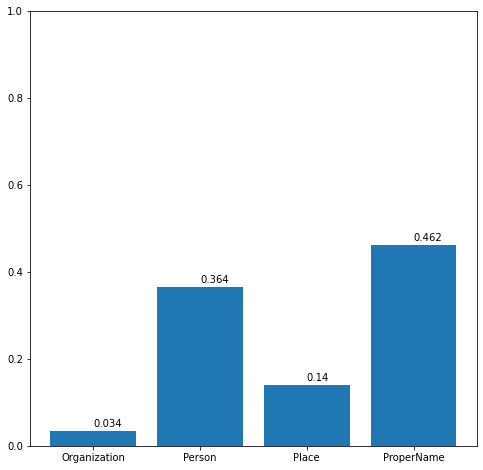


3.4 NUMBER OF TOKENS PER ENTITY TYPE
entity_type
Organization     4641
Person          32530
Place           10128
ProperName      32281
dtype: int64

3.4 AVERAGE NUMBER OF TOKENS OF EACH ENTITY PER ENTITY TYPE
entity_type
Organization    4.261708
Person          2.774650
Place           2.246174
ProperName      2.170297
dtype: float64


In [12]:
ns = big.groupby("entity_type").apply(lambda sub: (~sub.span.isna()).sum())

print("\n3.3 number of entities per type".upper())
print(ns)
print()
# print(big.groupby("entity_type").apply(lambda sub: (~sub.span.isna()).sum())/sub.shape[0])
print("3.3 percentage of entities of type".upper())
print((ns/ns.sum()))

# x, y = [1,2,3, 4], (ns/ns.sum())
# plt.figure(figsize=(8, 8))
# plt.bar(x, y)
# # plt.plot(x, y, ".", )
# for cur_x, cur_y in zip(x, y): plt.annotate(round(cur_y, 3), (cur_x, cur_y+0.01))
# _ = plt.xticks(x, y.index)
# plt.ylim((0, 1))
# plt.show()

barplot([1,2,3, 4], (ns/ns.sum()))



ns_toks = big.groupby("entity_type").apply(lambda sub:
                                     sub.entity_name.fillna('').str.split().apply(len).sum())

print("\n3.4 number of tokens per entity type".upper())
print(ns_toks)
print("\n3.4 average number of tokens of each entity per entity type".upper())
print(ns_toks/ns)

4. BENEFICIARY
No     925
Yes    165
Name: attr_val, dtype: int64

No     0.848624
Yes    0.151376
Name: attr_val, dtype: float64


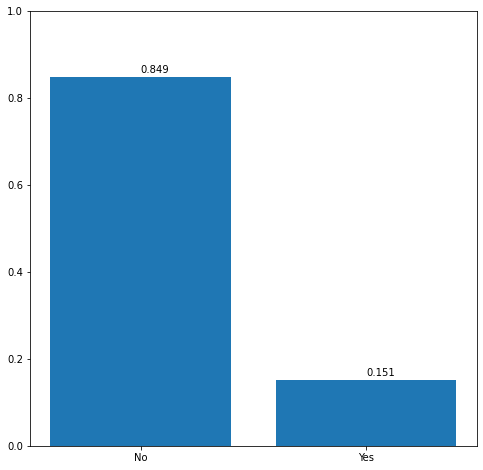


4. GENDER
Unspecified    5798
Man            4269
Woman          1231
Group           426
Name: attr_val, dtype: int64

Unspecified    0.494541
Man            0.364125
Woman          0.104998
Group          0.036336
Name: attr_val, dtype: float64


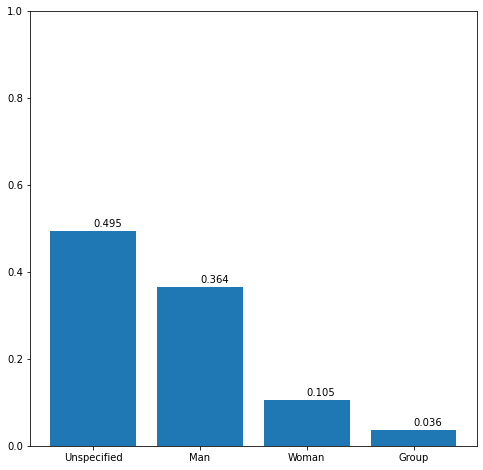


4. LEGALSTATUS
Unspecified    10693
Enslaved         882
Freed            149
Name: attr_val, dtype: int64

Unspecified    0.912061
Enslaved       0.075230
Freed          0.012709
Name: attr_val, dtype: float64


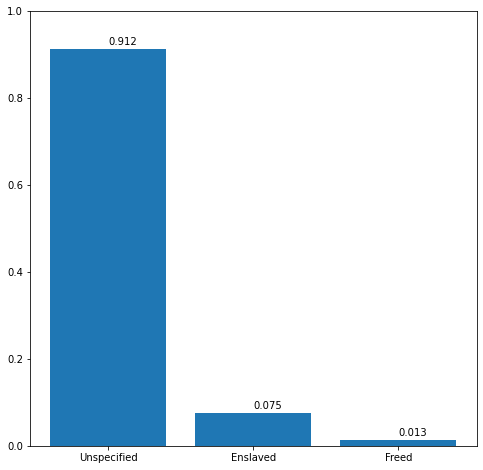


4. ROLE
Other                   5920
Beneficiary             1839
Testator                1300
Witness                 1115
Acting_Notary            805
Notary                   470
Testator_Beneficiary     275
Name: attr_val, dtype: int64

Other                   0.504947
Beneficiary             0.156858
Testator                0.110884
Witness                 0.095104
Acting_Notary           0.068663
Notary                  0.040089
Testator_Beneficiary    0.023456
Name: attr_val, dtype: float64


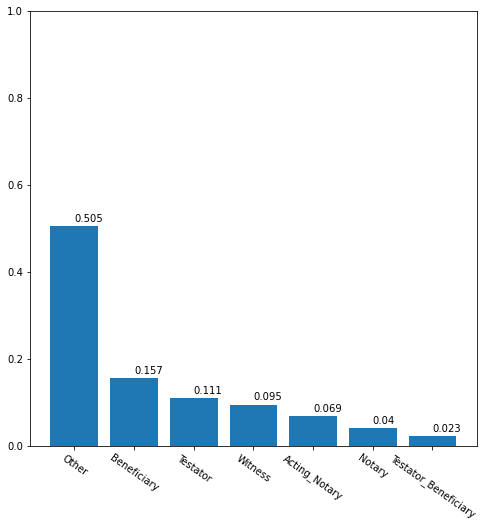

In [13]:
for at, sub in big.groupby("attr_type"):
    print(f"4. {at.upper()}")
    cs = sub.attr_val.value_counts()
    print(cs)
    print()
    print(cs/cs.sum())
    
    barplot(list(range(1, cs.shape[0]+1)),
           cs/cs.sum(), rotation=(360-35 if cs.shape[0] > 6 else 0))
    
    print()
#     sub.attr_val.hist(bins=20)
#     plt.title(at)
#     plt.show()


# big[big.attr_type == "Role"].attr_val.value_counts()